   ## EDA ON HABERMAN DATASET

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#load haberman.csv to a dataframe
haberman=pd.read_csv("haberman.csv",names=["age","year","nodes","survived"])
print (haberman.shape)
print (haberman.columns)
haberman.describe()

(306, 4)
Index(['age', 'year', 'nodes', 'survived'], dtype='object')


,age,year,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observation(s):

1. Dataset has 306 datapoints and 4 features - age,operation year,number of nodes,survived_status

In [18]:
haberman["survived"].value_counts()

1    225
2     81
Name: survived, dtype: int64

#### Observation(s):

1. Surivived Status is a two class variable,
   survived=1 implies patient survived 5 years or longer while survived=2 implies non survival of patient within 5 years
2. Percentage of people who survived 5 years or longer - 73.52


#### Objective :

To determine survival status of a patient for 5 years or longer given the features age,operation year and auxilary nodes.

#### UNIVARIATE ANALYSIS

In [29]:
survived_yes=haberman.loc[haberman["survived"] == 1];
survived_no=haberman.loc[haberman["survived"] == 2];
survived_yes.describe()


,age,year,nodes,survived
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [30]:
survived_no.describe()

,age,year,nodes,survived
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


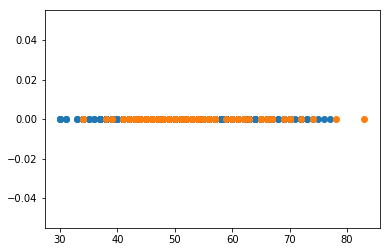

In [44]:
plt.plot(survived_yes['age'], np.zeros_like(survived_yes['age']), 'o')
plt.plot(survived_no['age'], np.zeros_like(survived_no['age']), 'o')
plt.show()

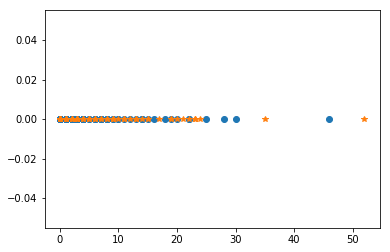

In [45]:
plt.plot(survived_yes['nodes'], np.zeros_like(survived_yes['age']), 'o')
plt.plot(survived_no['nodes'], np.zeros_like(survived_no['age']), '*')
plt.show()

C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


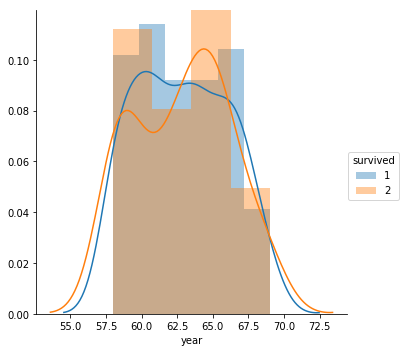

In [21]:
sns.FacetGrid(haberman, hue="survived", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


#### Observation(s):
    Plots are almost overlapped, no significant information retrieved

C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


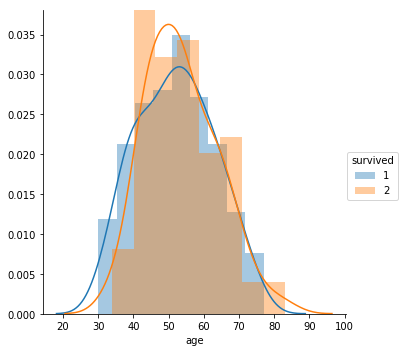

In [32]:
sns.FacetGrid(haberman, hue="survived", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

#### Observation(s):
    1.Patients aged below 34 survived 5 years or longer
    2.Patients aged above 77 died within 5 years.

C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
C:\Users\deepak\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.


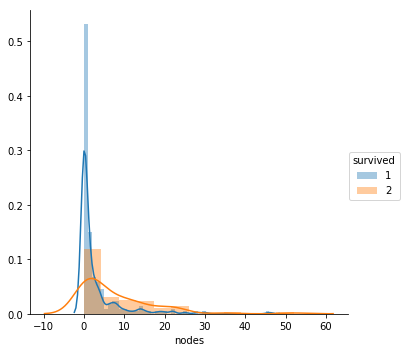

In [106]:
sns.FacetGrid(haberman, hue="survived", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


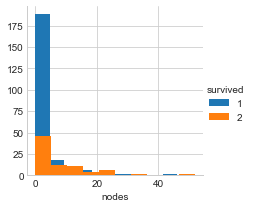

In [145]:
sns.FacetGrid(haberman, hue="survived", size=3) \
   .map(plt.hist, "nodes") \
   .add_legend();
plt.show();


In [133]:
haberman.loc[(haberman["nodes"]<=5)]["survived"].value_counts()

1    190
2     46
Name: survived, dtype: int64

#### Observation(s):
     1. Patients chance of survival decreases as number of nodes increases.
     2. Chance of suriving 5 years or longer is 80.5% if nodes does not exceed 5 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


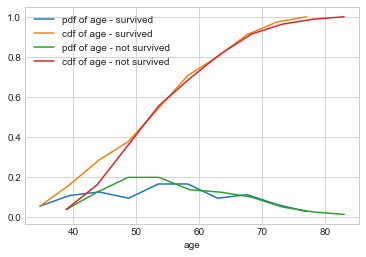

In [162]:
#PDF & CDF for Survived
counts, bin_edges = np.histogram(survived_yes['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of age - survived")
plt.plot(bin_edges[1:], cdf,label="cdf of age - survived")


#PDF & CDF for Not Survived
counts, bin_edges = np.histogram(survived_no['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of age - not survived")
plt.plot(bin_edges[1:], cdf,label="cdf of age - not survived")
plt.xlabel("age")
plt.legend()
plt.show();

#### Observation(s):
    Patients with age less than 37 survived while those with age greater than 78 did not survive 5 years

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


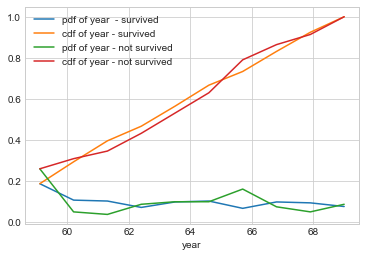

In [163]:
#PDF & CDF for Survived
counts, bin_edges = np.histogram(survived_yes['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of year  - survived")
plt.plot(bin_edges[1:], cdf,label="cdf of year - survived")


#PDF & CDF for Not Survived
counts, bin_edges = np.histogram(survived_no['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of year - not survived")
plt.plot(bin_edges[1:], cdf,label="cdf of year - not survived")
plt.xlabel("year")
plt.legend()
plt.show();

#### Observation(s):
    Plots are overlapped, hard to deduce any information

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


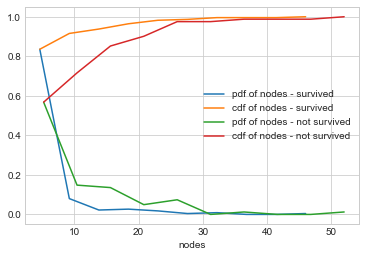

In [164]:
#PDF & CDF for Survived
counts, bin_edges = np.histogram(survived_yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of nodes - survived")
plt.plot(bin_edges[1:], cdf,label="cdf of nodes - survived")


#PDF & CDF for Survived
counts, bin_edges = np.histogram(survived_no['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf of nodes - not survived")
plt.plot(bin_edges[1:], cdf,label="cdf of nodes - not survived")
plt.xlabel("nodes")
plt.legend()
plt.show();

#### Observation(s):
    1.Patients with less nodes have higher chance to survival 5 years or longer.

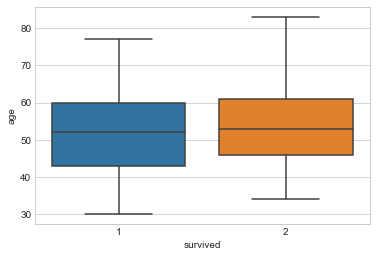

In [155]:
sns.boxplot(x="survived",y='age', data=haberman)
plt.show()

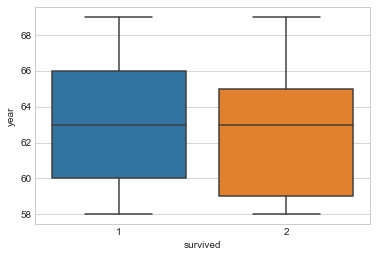

In [156]:
sns.boxplot(x="survived",y='year', data=haberman)
plt.show()

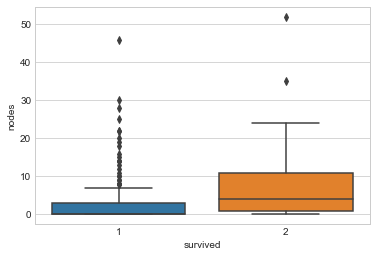

In [157]:
sns.boxplot(x="survived",y='nodes', data=haberman)
plt.show()

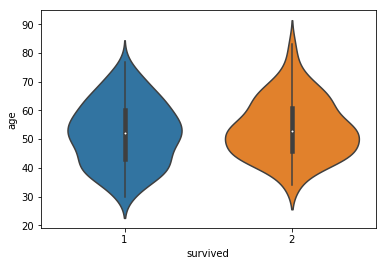

In [137]:
sns.violinplot(x="survived", y="age", data=haberman, size=8)
plt.show()

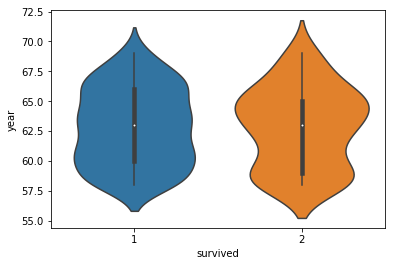

In [138]:
sns.violinplot(x="survived", y="year", data=haberman, size=8)
plt.show()

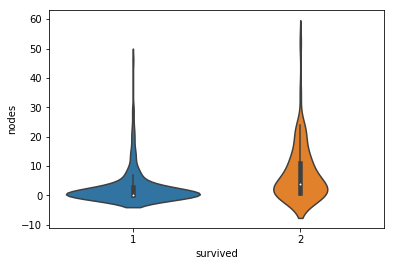

In [139]:
sns.violinplot(x="survived", y="nodes", data=haberman, size=8)
plt.show()

### BIVARIATE ANALYSIS

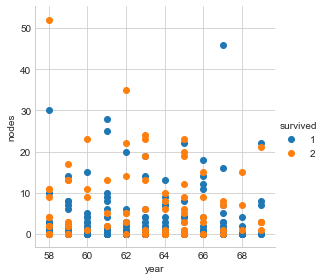

In [142]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survived", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

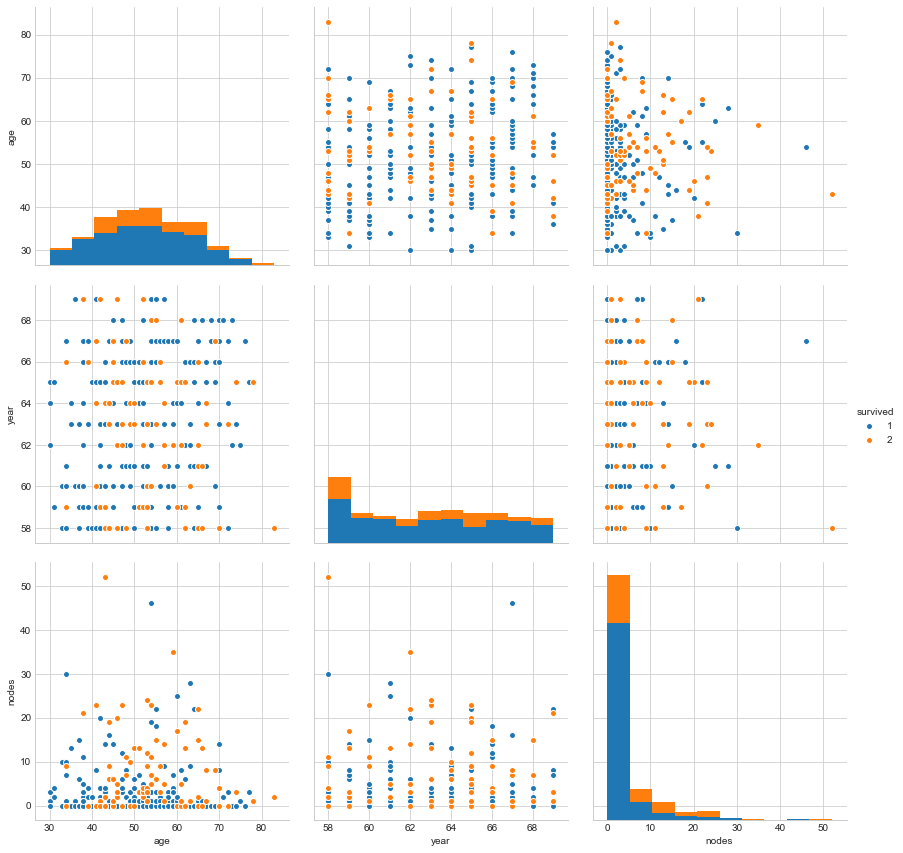

In [165]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survived", vars=['age', 'year', 'nodes'],size=4);
plt.show()

#### Observation(s):
    1.Patients with age less than 40 and having nodes less than 5 have high chances to survive 5 years or longer

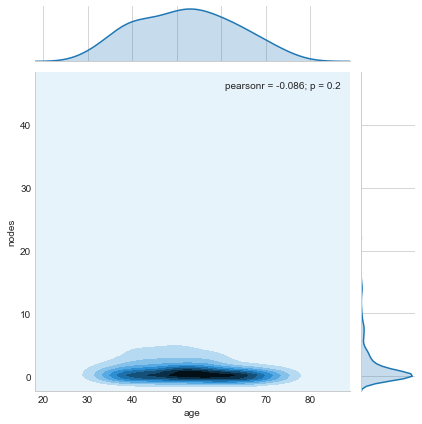

In [167]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=survived_yes, kind="kde");
plt.show();


#### Observation(s):
   High density is observed for patients having nodes less than 2, age between 50-60

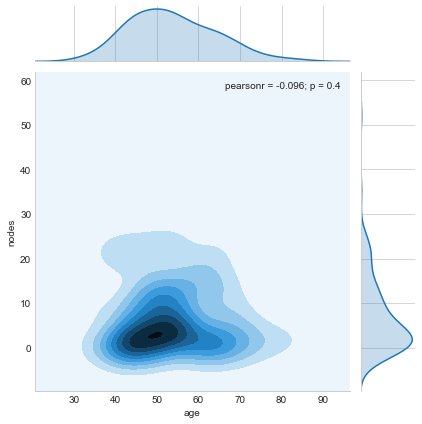

In [168]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=survived_no, kind="kde");
plt.show();

#### Conclusion(s):
    1.Patients with nodes less than 3 and age less than 40 are most likely to survive 5 years or longer.
    